In [1]:
import os
from os.path import exists

import re
import numpy as np

import pandas as pd 
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [8]:
path_rasa_list = '/Users/rhythmjain/GT-files/2-2/CompMus/ComputationalMusicology-TheRagaGuide/RagaList.xlsx'
raga_rasa = pd.read_excel(path_rasa_list)[['Raga', 'FileName', 'Vadi', 'Samvadi', 'Rasa', 'ALT_Rasa']]

display(raga_rasa)
display(raga_rasa.groupby(['Rasa']).count().sort_values('Raga', ascending=False))
# display(raga_rasa.groupby(['ALT_Rasa']).count().sort_values('Raga', ascending=False))



,Raga,FileName,Vadi,Samvadi,Rasa,ALT_Rasa
0,Abhogi,Abhogi_D1T1.txt,Sa,Ma,Virah,Karuna
1,Adana,Adana_D1T2.txt,Sa,Pa,Veer,Veer
2,Ahir Bhairav,Ahir_bhairav_D1T3.txt,Ma,Sa,Bhakti,Bhakti
3,Alhaiya bilaval,Alhaiya_bilaval_D1T4.txt,Dha,Ga,Adbhut,Adbhut
4,Asavari,Asavari_D1T5.txt,Dha,Ga,Bhakti,Bhakti
...,...,...,...,...,...,...
69,Sohini,sohini.txt,Dha,Ga,Karuna,Karuna
70,Sur Malhar,sur_malhar.txt,Ma,Sa,Adbhut,Adbhut
71,Tilak Kamod,tilak_kamod.txt,Re,Pa,Hasya,Hasya
72,Tilang,tilang.txt,Ga,Ni,Shringar,Shringar


,Raga,FileName,Vadi,Samvadi,ALT_Rasa
Rasa,,,,,
Shringar,33,33,33,33,33
Bhakti,11,11,11,11,11
Karuna,7,7,7,7,7
Adbhut,5,5,5,5,5
Veer,5,5,5,5,5
Raudra,4,4,4,4,4
Virah,3,3,3,3,3
Hasya,2,2,2,2,2
Shaant,2,2,2,2,2


### Pre and post balancing


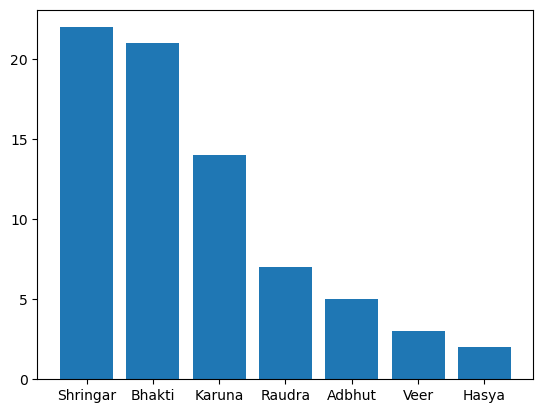

([<matplotlib.axis.XTick at 0x16365dd00>,
 [Text(0, 0, 'Shringar'),
  Text(1, 0, 'Bhakti'),
  Text(2, 0, 'Karuna'),
  Text(3, 0, 'Adbhut'),
  Text(4, 0, 'Veer'),
  Text(5, 0, 'Raudra'),
  Text(6, 0, 'Virah'),
  Text(7, 0, 'Hasya'),
  Text(8, 0, 'Shaant'),
  Text(9, 0, 'Bhayanaka'),
  Text(10, 0, 'Gambhir')])

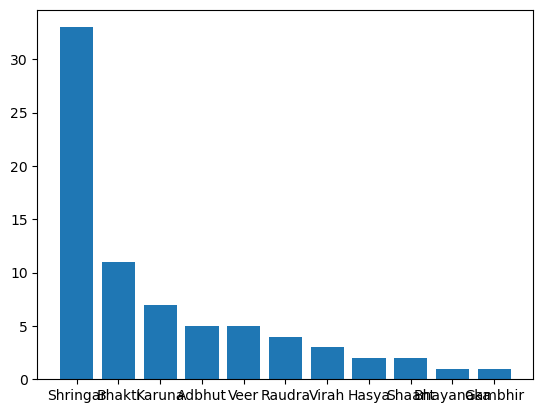

In [51]:
#Pre and post balancing

old = raga_rasa.groupby(['Rasa']).count().sort_values('Raga', ascending=False)


new = raga_rasa.groupby(['ALT_Rasa']).count().sort_values('Raga', ascending=False)


new[['Raga']].index
alt_rasa_tally =  new[['Raga']]
plt.bar(np.arange(0, 7, 1),alt_rasa_tally.values.flatten())
plt.xticks(np.arange(0, 7, 1), new[['Raga']].index)

plt.show()

old[['Raga']].index
old_rasa_tally =  old[['Raga']]
plt.bar(np.arange(0, len(old), 1),old_rasa_tally.values.flatten())
plt.xticks(np.arange(0, len(old), 1), old[['Raga']].index)

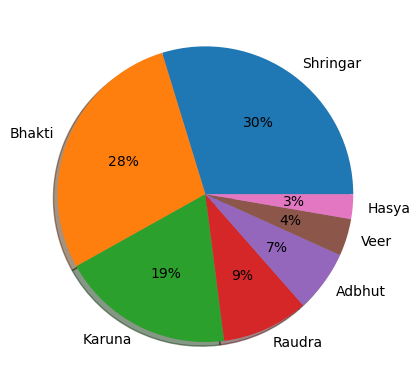

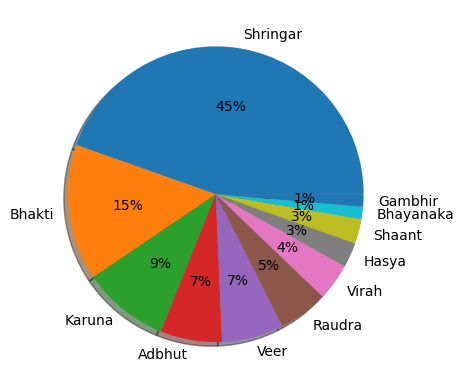

In [61]:
#Pre and post balancing

x=alt_rasa_tally.values.flatten()
plt.pie(x, labels=new[['Raga']].index, autopct='%1.f%%',
        shadow=True,textprops={"fontsize":10})
plt.savefig('imgs/post_balance.png')
plt.show()


x=old_rasa_tally.values.flatten()
plt.pie(x, labels=old[['Raga']].index, autopct='%1.f%%',
        shadow=True, textprops={"fontsize":10})
plt.savefig('imgs/pre_balance.png')

plt.show()


In [7]:
#distribution of vadi and samvadi notes -TABLING IT FOR THE FUTURE,

In [11]:
vadi = raga_rasa.groupby(['Vadi']).count().sort_values('Raga', ascending=False)['Raga']
vadi

Vadi
Dha    14
Ga     14
Ma     14
Pa     12
Re      7
Sa      5
Ma      4
Sa      3
Ga      1
Name: Raga, dtype: int64